In [1]:
# libraries
from customCLIP import customCLIP
import pandas as pd

/usr/local/Caskroom/miniconda/base/envs/EuroSAT/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
customclip = customCLIP()
customclip.train(few_shot=1, mode="coop", save_model=False)


Training coop with 1-shot data...
Epoch [0/1000] | Train Loss: 4.0210 | Val Loss 4.3796 | Val Acc: 17.20%
Epoch [250/1000] | Train Loss: 0.0005 | Val Loss 2.0571 | Val Acc: 46.20%
Epoch [500/1000] | Train Loss: 0.0002 | Val Loss 2.1615 | Val Acc: 47.40%
Epoch [750/1000] | Train Loss: 0.0001 | Val Loss 2.2525 | Val Acc: 48.60%
Epoch [1000/1000] | Train Loss: 0.0000 | Val Loss 2.3280 | Val Acc: 48.20%


In [3]:
FEW_SHOT = 8
MODE = "coop"
IMAGE_PATH = "2750/Forest/Forest_109.jpg"

customclip = customCLIP(model_name="openai/clip-vit-base-patch32")

if MODE == "coop":
    model_path = f"models/prompt_learners/coop/{FEW_SHOT}_shot.pth"
    customclip.load_model(model_path, mode=MODE)
elif MODE in ["linear_probe", "MLP_probe", "logreg_probe"]:
    model_path = f"results/classifiers/{MODE}/{FEW_SHOT}-shot"
    customclip.load_model(model_path, mode=MODE)
elif MODE == "zeroshot":
    pass

customclip.set_testing_mode(MODE)
prediction, prob = customclip.classify_images_clip([IMAGE_PATH])
print(prediction.item(), prob.item())
# print(customclip.class_labels[prediction.item()])

Loaded coop model from models/prompt_learners/coop/8_shot.pth
Testing in coop mode
1 0.9504203796386719


In [4]:
customclip = customCLIP(model_name="openai/clip-vit-base-patch32", full_prompt=True, modify=True,augment_hue=True)
# customclip.load_model("models/classifiers/linear_probe/16-shot.pth", mode="linear_probe")
# results = customclip.train(few_shot=8, mode="CoOp", save_model=False)

In [5]:
customclip.train(few_shot=16, mode="linear_probe", save_model=True)


Training linear probe with 16-shot data...
Epoch [0/1000] | Train Loss: 2.3146 | Val Loss 2.2749 | Val Acc: 11.00%
Epoch [250/1000] | Train Loss: 0.1747 | Val Loss 0.5314 | Val Acc: 84.20%
Epoch [500/1000] | Train Loss: 0.0620 | Val Loss 0.4734 | Val Acc: 83.60%
Epoch [750/1000] | Train Loss: 0.0324 | Val Loss 0.4635 | Val Acc: 83.80%
Epoch [1000/1000] | Train Loss: 0.0202 | Val Loss 0.4637 | Val Acc: 84.00%
linear_probe model saved at models/classifiers/linear_probe/16-shot.pth


In [7]:
customclip = customCLIP(model_name="openai/clip-vit-base-patch32", full_prompt=True, modify=True,augment_hue=True)

customclip.load_model("models/classifiers/linear_probe/16-shot.pth", mode="linear_probe")

customclip.set_testing_mode("probe")
results = customclip.single_class_analysis("Forest")

Loaded linear_probe model from models/classifiers/linear_probe/16-shot.pth
Testing in probe mode


Classifying Forest batches: 100%|██████████| 47/47 [00:18<00:00,  2.57it/s]


In [8]:
results['accuracy']

0.9363333333333334

In [10]:
results_df = pd.read_csv("results/classifiers/linear_probe/16-shot")
results_df.accuracy

0    0.828667
1    0.937000
2    0.847667
3    0.777200
4    0.945200
5    0.854500
6    0.673600
7    0.878000
8    0.784000
9    0.926333
Name: accuracy, dtype: float64

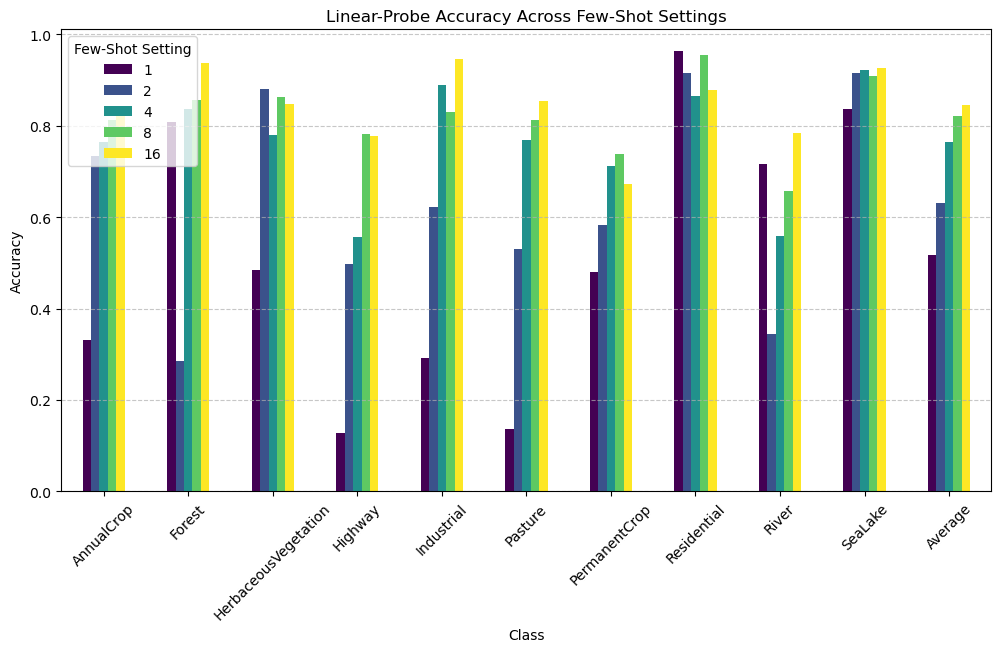

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

def classifiers_accuracies(mode):

    # Define few-shot settings
    few_shot_settings = [1, 2, 4, 8, 16]

    # Load results into a dictionary
    accuracy_per_class = {}

    for few_shot in few_shot_settings:
        results_df = pd.read_csv(f"results/classifiers/{mode}/{few_shot}-shot")
        accuracy_per_class[few_shot] = list(results_df.accuracy)  # Assuming accuracy is per class

        average_few_shot_accuracy = results_df.accuracy.mean()
        accuracy_per_class[few_shot].append(average_few_shot_accuracy)

    # Convert to DataFrame
    class_names = results_df["class"].tolist()

    # Add "average" as the last class entry for the index
    class_names.append("Average")



    accuracy_df = pd.DataFrame(accuracy_per_class, index=class_names)  # Assuming 'class' column exists
    accuracy_df
    # Add average accuracy column at the beginning
    # accuracy_df.insert(0, "Average Accuracy", accuracy_df.mean(axis=1))

    # Plot
    accuracy_df.plot(kind="bar", figsize=(12, 6), colormap="viridis")
    plt.xlabel("Class")
    plt.ylabel("Accuracy")
    plt.title("Linear-Probe Accuracy Across Few-Shot Settings")
    plt.legend(title="Few-Shot Setting", loc="upper left")
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    plt.show()
